<a href="https://colab.research.google.com/github/imranrahman1997/30-days_30-projects/blob/main/Project_(2)_Fake_News_Detection_Using_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import re
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score
import seaborn as sns 
plt.style.use('ggplot')

In [2]:
fake = '/content/drive/MyDrive/30 days projects/Project_2/Fake.csv'
true = '/content/drive/MyDrive/30 days projects/Project_2/True.csv'

In [3]:
fake_df = pd.read_csv(fake)
true_df = pd.read_csv(true)

In [4]:
fake_df.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [5]:
true_df.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [6]:
fake_df.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [7]:
true_df.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

For finding the the similar distribution of both dataset we need to check the unique values 

In [8]:
fake_df.subject.unique()

array(['News', 'politics', 'Government News', 'left-news', 'US_News',
       'Middle-east'], dtype=object)

In [9]:
true_df.subject.unique()

array(['politicsNews', 'worldnews'], dtype=object)

In [10]:
fake_df.columns

Index(['title', 'text', 'subject', 'date'], dtype='object')

In [11]:
true_df.columns

Index(['title', 'text', 'subject', 'date'], dtype='object')

For unique values, we see that subjects are not equally distributed. so we need to remove the subject from the dataset and we also need to drop the date from the dataset, as date date has no significance in this dataset

In [12]:
fake_df.drop(['date', 'subject'], axis = 1, inplace = True)
true_df.drop(['date', 'subject'], axis = 1, inplace = True)

Set an extra column where 0 for fake news and 1 for real news

In [13]:
fake_df['class'] = 0
true_df['class'] = 1

In [14]:
fake_df.head()

,title,text,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,0


Text(0, 0.5, '# of news articles')

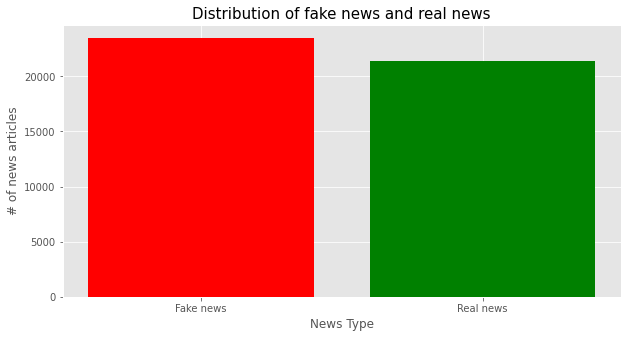

In [15]:
plt.figure(figsize = (10, 5))
plt.bar('Fake news', len(fake_df), color = 'red')
plt.bar('Real news', len(true_df), color = 'green')
plt.title('Distribution of fake news and real news', size = 15)
plt.xlabel('News Type')
plt.ylabel('# of news articles')

Text(0, 0.5, 'Proportion of news articles')

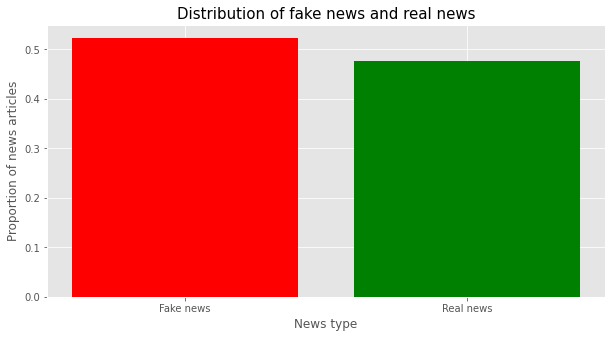

In [16]:
total_len = len(fake_df) + len(true_df) 

plt.figure(figsize = (10, 5))
plt.bar('Fake news' , len(fake_df) / total_len, color = 'red')
plt.bar('Real news', len(true_df) / total_len, color = 'green')
plt.title('Distribution of fake news and real news', size = 15)
plt.xlabel('News type')
plt.ylabel('Proportion of news articles')


In [17]:
print('Difference in news articles:', len(fake_df)-len(true_df))

Difference in news articles: 2064


In [18]:
news_df = pd.concat([fake_df, true_df], ignore_index = True, sort = False)

In [19]:
news_df

,title,text,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,0
...,...,...,...
44893,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,1
44894,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",1
44895,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,1
44896,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,1


In [20]:
news_df['text'] = news_df['title'] + news_df['text']
news_df.head()

,title,text,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump Sends Out Embarrassing New Year’...,0
1,Drunk Bragging Trump Staffer Started Russian ...,Drunk Bragging Trump Staffer Started Russian ...,0
2,Sheriff David Clarke Becomes An Internet Joke...,Sheriff David Clarke Becomes An Internet Joke...,0
3,Trump Is So Obsessed He Even Has Obama’s Name...,Trump Is So Obsessed He Even Has Obama’s Name...,0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis Just Called Out Donald Trump Dur...,0


In [21]:
news_df['text']

0         Donald Trump Sends Out Embarrassing New Year’...
1         Drunk Bragging Trump Staffer Started Russian ...
2         Sheriff David Clarke Becomes An Internet Joke...
3         Trump Is So Obsessed He Even Has Obama’s Name...
4         Pope Francis Just Called Out Donald Trump Dur...
                               ...                        
44893    'Fully committed' NATO backs new U.S. approach...
44894    LexisNexis withdrew two products from Chinese ...
44895    Minsk cultural hub becomes haven from authorit...
44896    Vatican upbeat on possibility of Pope Francis ...
44897    Indonesia to buy $1.14 billion worth of Russia...
Name: text, Length: 44898, dtype: object

In [22]:
news_df.drop('title', axis = 1, inplace = True)

In [23]:
news_df.head()

,text,class
0,Donald Trump Sends Out Embarrassing New Year’...,0
1,Drunk Bragging Trump Staffer Started Russian ...,0
2,Sheriff David Clarke Becomes An Internet Joke...,0
3,Trump Is So Obsessed He Even Has Obama’s Name...,0
4,Pope Francis Just Called Out Donald Trump Dur...,0


In [24]:
from sklearn.utils import shuffle
df = shuffle(news_df)
df

,text,class
25261,U.S. Marshals Service wastes asset forfeiture ...,1
11469,SLEEZY DEMOCRAT SENATOR Caught Fabricating Sto...,0
13072,WOW! MSNBC’s Senior Political Analyst Hammers ...,0
31042,Arizona ballot-collection law put on hold unti...,1
14845,PRICELESS! DONALD TRUMP Joined By The Ladies O...,0
...,...,...
33706,U.S. says it may not need Apple to open San Be...,1
33289,"Obama, Merkel push for trade deal as foreign c...",1
14519,MADELINE ALBRIGHT: There’s A Special Place In ...,0
3992,Democrats In Four States Are Now SUING Trump ...,0


In [25]:
features = df['text']
targets = df['class']

x_train, x_test, y_train, y_test = train_test_split(features, targets, test_size = 0.2)

In [26]:
x_train

12144    UNHINGED! NANCY PELOSI’S DAUGHTER Blows Up At ...
12406    WOW! AMERICA IS UNDER ATTACK By These 187 Orga...
17151    BUSTED! DEM TX REP PLAYS RACE CARD, LIES ABOUT...
28134    U.S. government watchdog to review Mar-a-Lago ...
24851    Treasury pushes U.S. regulatory interests, set...
                               ...                        
12022    WASTED? CNN ANCHOR’S Mic Cut After He Starts S...
20061    WHY TRUMP SUPPORTERS ARE LAUGHING After WikiLe...
39717    Spain sacks Catalan government after independe...
34053    Gaining momentum on Super Tuesday, Clinton tak...
10756    MSNBC “ANALYST” Shocks Host When He Makes Outr...
Name: text, Length: 35918, dtype: object

Normalize the data to get rid of extra space and url links

In [27]:
def normalize(data):
    normalized = []
    for i in data:
        i = i.lower()
        # get rid of urls
        i = re.sub('https?://\S+|www\.\S+', '', i)
        # get rid of non words and extra spaces
        i = re.sub('\\W', ' ', i)
        i = re.sub('\n', '', i)
        i = re.sub(' +', ' ', i)
        i = re.sub('^ ', '', i)
        i = re.sub(' $', '', i)
        normalized.append(i)
    return normalized

In [28]:
x_train = normalize(x_train)

In [29]:
x_test = normalize(x_test)

In [30]:
x_train

['unhinged nancy pelosi s daughter blows up at cavuto claiming she s getting death threats video',
 'wow america is under attack by these 187 organizations directly funded by george sorosthere have been many articles written about george soros and his collectivist activism soros is a business magnate investor philanthropist and author who is of jewish hungarian ancestry and holds dual citizenship he is chairman of soros fund management discover the networks has published a comprehensive list of organizations funded by soros and his open society institute some of these groups have actively opposed donald trump for president and may be part of the recent levels of violence and chaos seen at his rallies many of the groups favor open borders amnesty giving illegals voting rights muslim migration and social justice advancement project this organization works to organize communities of color into politically cohesive units while disseminating its leftist worldviews and values as broadly as p

In [31]:
#tokenize text
max_vocab = 10000
tokenizer = Tokenizer(num_words = max_vocab)
tokenizer.fit_on_texts(x_train)

In [32]:
#tokenize the text into vectors
x_train = tokenizer.texts_to_sequences(x_train)
x_test = tokenizer.texts_to_sequences(x_test)

In [33]:
#x_train

In [34]:
#padding
x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train, padding = 'post', maxlen = 256)
x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test, padding = 'post', maxlen = 256)

In [35]:
x_train

array([[4946, 2287, 1789, ...,    0,    0,    0],
       [3046,    3,    1, ..., 1739,  206,  140],
       [  17,   73, 7443, ...,  748,  547,   34],
       ...,
       [  56,  441,   25, ...,  278,   26,   82],
       [3092,   16,   19, ..., 2606,   48, 1896],
       [1556, 2598,  702, ...,    0,    0,    0]], dtype=int32)

In [37]:
# Building RNN
model = tf.keras.Sequential([
      tf.keras.layers.Embedding(max_vocab, 32),
      tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
      tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16)),
      tf.keras.layers.Dense(64, activation = 'relu'),
      tf.keras.layers.Dense(1)
])

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 32)          320000    
_________________________________________________________________
bidirectional (Bidirectional (None, None, 128)         49664     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 32)                18560     
_________________________________________________________________
dense (Dense)                (None, 64)                2112      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 390,401
Trainable params: 390,401
Non-trainable params: 0
_________________________________________________________________


In [39]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

In [40]:
model.compile(loss = tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer = tf.keras.optimizers.Adam(1e-4),
              metrics = ['accuracy'])

In [41]:
history = model.fit(
    x_train, y_train,
    epochs = 20,
    validation_split = 0.1,
    batch_size = 30,
    shuffle = True, 
    callbacks = [early_stop]
)

Epoch 1/20
1078/1078 [==============================] - 76s 38ms/step - loss: 0.4289 - accuracy: 0.7427 - val_loss: 0.0718 - val_accuracy: 0.9763
Epoch 2/20
1078/1078 [==============================] - 39s 37ms/step - loss: 0.0491 - accuracy: 0.9867 - val_loss: 0.0483 - val_accuracy: 0.9855
Epoch 3/20
1078/1078 [==============================] - 39s 36ms/step - loss: 0.0208 - accuracy: 0.9957 - val_loss: 0.0420 - val_accuracy: 0.9883
Epoch 4/20
1078/1078 [==============================] - 39s 37ms/step - loss: 0.0122 - accuracy: 0.9976 - val_loss: 0.0525 - val_accuracy: 0.9891
Epoch 5/20
1078/1078 [==============================] - 39s 36ms/step - loss: 0.0099 - accuracy: 0.9975 - val_loss: 0.0441 - val_accuracy: 0.9886


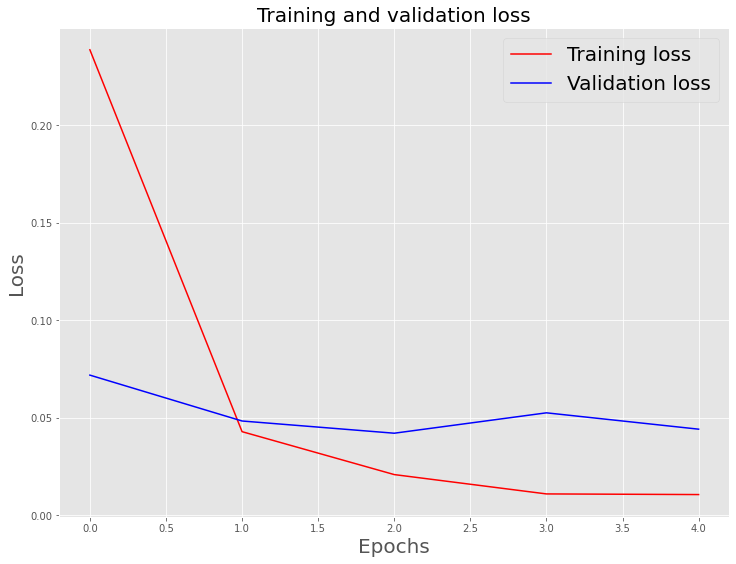

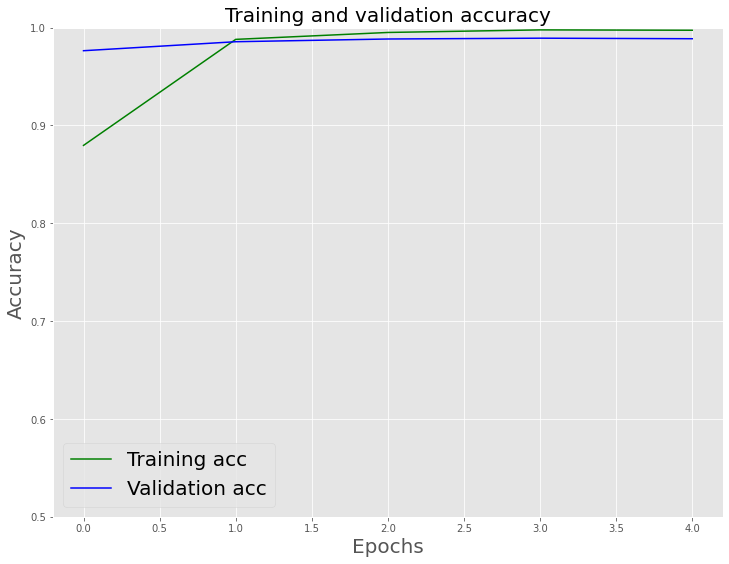

In [42]:
history_dict = history.history

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = history.epoch

plt.figure(figsize=(12,9))
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss', size=20)
plt.xlabel('Epochs', size=20)
plt.ylabel('Loss', size=20)
plt.legend(prop={'size': 20})
plt.show()

plt.figure(figsize=(12,9))
plt.plot(epochs, acc, 'g', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy', size=20)
plt.xlabel('Epochs', size=20)
plt.ylabel('Accuracy', size=20)
plt.legend(prop={'size': 20})
plt.ylim((0.5,1))
plt.show()

In [43]:
model.evaluate(x_test, y_test)

281/281 [==============================] - 4s 15ms/step - loss: 0.0370 - accuracy: 0.9896


[0.03703329339623451, 0.9896436333656311]

In [44]:
#let's predict

pred = model.predict(x_test)

predictions = []

for i in pred:
  if i >= 0.5:
    predictions.append(1)
  else:
    predictions.append(0)

In [ ]:
predictions

In [47]:
print('Accuracy:', accuracy_score(predictions, y_test))

Accuracy: 0.9896436525612472


In [48]:
print('Precision score :', precision_score(predictions, y_test))

Precision score : 0.9882189882189882


In [50]:
print('Recall score:', recall_score(predictions, y_test))

Recall score: 0.9902777777777778


[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

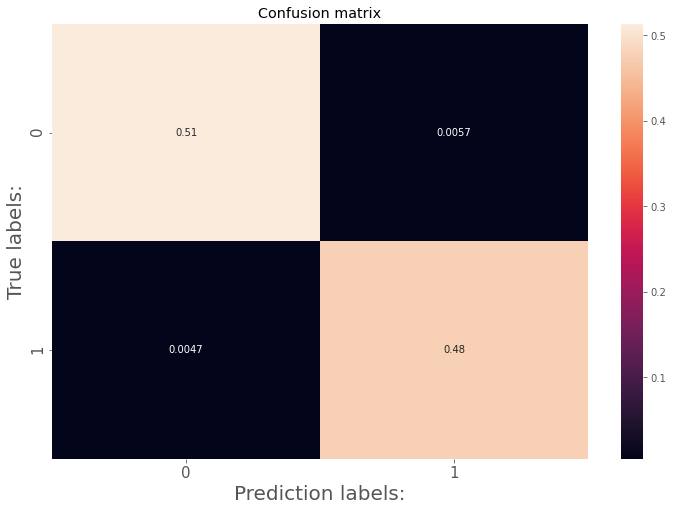

In [54]:
#Confusion matrix

matrix = confusion_matrix(predictions, y_test, normalize='all')
plt.figure(figsize = (12,8))
ax = plt.subplot()
sns.heatmap(matrix, annot = True, ax = ax)

ax.set_xlabel('Prediction labels:', size = 20)
ax.set_ylabel('True labels:', size = 20)
ax.set_title('Confusion matrix')
ax.xaxis.set_ticklabels([0,1], size=15)
ax.yaxis.set_ticklabels([0,1], size=15)